<a href="https://colab.research.google.com/github/SiddharthDNathan/Unsupervised-ML-Netflix-Movies-and-TV-Shows-Clustering/blob/main/Unsupervised_ML_Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install category_encoders

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
df = pd.read_csv('/content/drive/MyDrive/CSV Files/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [42]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [43]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [44]:
df.shape

(7787, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [46]:

df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [47]:
df.dropna(inplace = True)

In [48]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [49]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [50]:
duplicate_rows = df[df.duplicated()]

print("Duplicate rows across all columns:")
print(duplicate_rows)

Duplicate rows across all columns:
Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []


In [51]:
df.describe()

,release_year
count,4808.000000
mean,2012.710275
std,9.521541
min,1942.000000
25%,2011.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


In [52]:
df.drop(columns = ['show_id', 'title'],inplace = True)

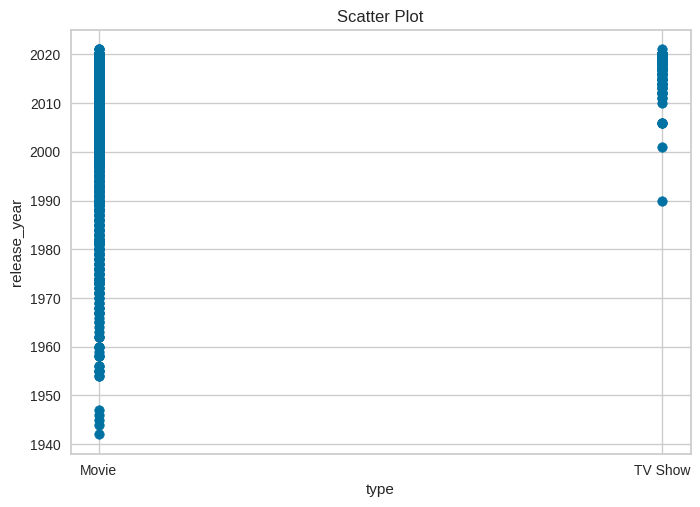

In [53]:
plt.scatter(df['type'], df['release_year'])
plt.xlabel('type')
plt.ylabel('release_year')
plt.title('Scatter Plot')
plt.show()

In [54]:
columns_to_encode = ['type', 'country', 'rating']
label_encoder = ce.OrdinalEncoder(cols=columns_to_encode)
df = label_encoder.fit_transform(df)

In [55]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Lemmatize and remove stopwords
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])

columns_to_tok_lem = ['director', 'cast', 'listed_in', 'description']
for column in columns_to_tok_lem:
     df[column+'_processed'] = df[column].apply(preprocess)

#TF-ITF
cols_to_vectorize = ['director_processed', 'cast_processed', 'listed_in_processed', 'description_processed' ]
tfidf_vectorizers = {}
tfidf_matrices = {}
for column in cols_to_vectorize:
    tfidf_vectorizers[column] = TfidfVectorizer()
    tfidf_matrices[column] = tfidf_vectorizers[column].fit_transform(df[column])

tfidf_df = pd.DataFrame(tfidf_matrices[column].toarray(), columns=tfidf_vectorizers[column].get_feature_names_out())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
tfidf_df

,000,007,10,100,1000,10th,11,112,11th,12,...,zuckerberg,zuhu,zurich,álex,álvaro,ángel,émile,über,ōarai,şeref
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
scaler = StandardScaler()
tfidf_df = scaler.fit_transform(tfidf_df)

In [58]:
pca = PCA()
tfidf_df = pca.fit_transform(tfidf_df)

In [59]:
pca_tfidfdf = pd.DataFrame(data = tfidf_df, columns=[f'PC{i+1}' for i in range(len(tfidf_df))])

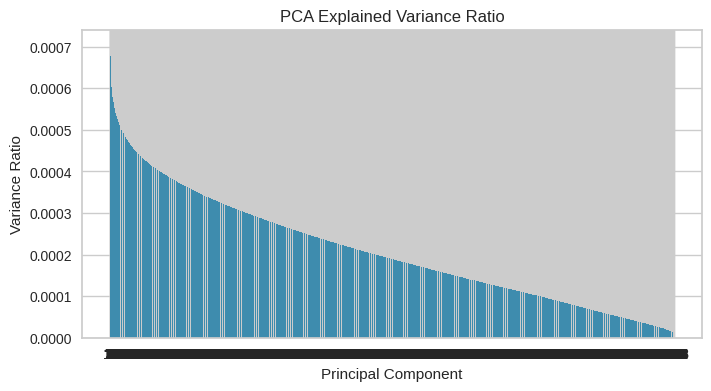

In [60]:
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('PCA Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

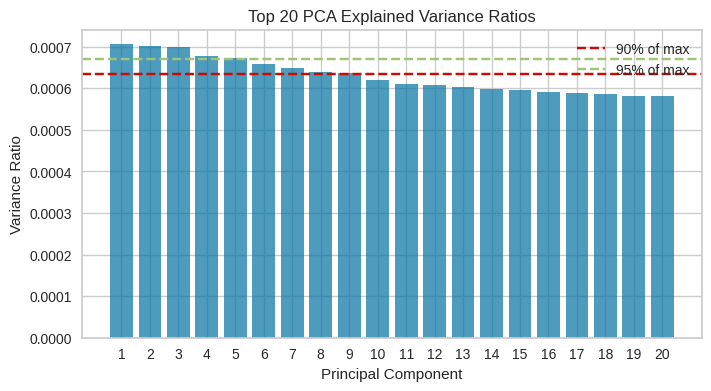

In [61]:
top_20_explained_variance = explained_variance[:20]

# Plotting the top 20 explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(top_20_explained_variance) + 1), top_20_explained_variance, alpha=0.7, align='center')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Top 20 PCA Explained Variance Ratios')
plt.xticks(range(1, len(top_20_explained_variance) + 1))


highest_value = max(top_20_explained_variance)
threshold_90 = 0.9 * highest_value
threshold_95 = 0.95 * highest_value

# Add horizontal lines at 90% and 95% of highest value
plt.axhline(y=threshold_90, color='r', linestyle='--', label='90% of max')
plt.axhline(y=threshold_95, color='g', linestyle='--', label='95% of max')

# Show legend
plt.legend()

plt.show()

In [62]:
n = 9
pca_2 = PCA(n_components=n)
tfidf_df2 = pca_2.fit_transform(tfidf_df)

In [63]:
pca_tfidfdf2 = pd.DataFrame(data = tfidf_df2, columns=[f'PC{i+1}' for i in range(n)])

In [64]:
pca_tfidfdf2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.327171,-0.235729,-0.855226,0.440415,-0.799689,-0.385988,0.117654,0.430710,0.518936
1,-0.624972,-0.082655,-0.554424,0.470592,-0.093342,-0.788331,0.995690,0.232760,-0.229007
2,-0.201797,0.461482,-0.155894,0.035527,0.555653,-0.821998,0.136452,0.372274,0.486771
3,-0.055862,-0.036961,0.375858,1.901966,-0.458378,1.085123,-1.556943,-0.390800,5.018398
4,-1.094684,0.535379,0.511395,0.900800,0.093017,-1.064656,0.872082,-0.293723,-0.866772
...,...,...,...,...,...,...,...,...,...
4803,-0.285808,0.121533,-0.247716,0.738898,0.131723,0.147594,0.491800,-0.375440,-0.304515
4804,-0.078231,0.062328,-0.095244,-0.178772,0.295348,-0.498308,1.675037,-0.328470,-0.357628
4805,-0.328222,-0.121074,0.122483,0.189350,0.136857,-0.576555,1.835153,0.622465,0.706508
4806,-0.467006,0.251930,-0.976696,1.125715,0.646900,-0.516905,0.625771,0.026502,0.346777


In [65]:
cols_to_drop = [ 'director', 'cast', 'listed_in', 'description','director_processed', 'cast_processed', 'listed_in_processed', 'description_processed' ]
df.drop(columns = cols_to_drop, inplace = True)

In [66]:
df['date_added'] = df['date_added'].str.strip()

df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y')

df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month
df['day'] = df['date_added'].dt.day
df['day_of_week'] = df['date_added'].dt.dayofweek


In [67]:
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(int)

In [68]:
df.drop(columns = ['date_added','year','duration'], inplace = True)

In [69]:
scaled_array = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_array, columns=df.columns)

In [70]:
scaled_df

,type,country,release_year,rating,month,day,day_of_week,duration_numeric
0,-0.169969,-0.465399,0.345539,-0.923908,1.459507,1.111114,0.558809,-0.212974
1,-0.169969,-0.455843,-0.179640,-0.519488,1.459507,0.810007,0.003465,-0.698547
2,-0.169969,-0.446287,-0.389712,-0.115068,1.182952,0.408531,0.003465,-0.633804
3,-0.169969,-0.446287,-0.494748,-0.115068,-1.582599,-1.097002,-0.551878,0.758173
4,5.883436,-0.436731,0.345539,-0.923908,0.076731,-1.097002,1.114152,-3.191156
...,...,...,...,...,...,...,...,...
4803,-0.169969,-0.446287,-0.389712,-0.519488,1.182952,-1.097002,0.558809,-0.374831
4804,-0.169969,-0.417619,0.555611,-0.923908,0.076731,-1.097002,1.669496,-0.180602
4805,-0.169969,-0.446287,-0.704820,1.907031,-1.582599,-0.093313,1.114152,-0.374831
4806,-0.169969,4.723495,-0.809856,-0.923908,0.906397,0.709638,-1.662566,-0.018744


In [71]:
final_df = pd.concat([scaled_df, pca_tfidfdf2], axis=1)

In [72]:
final_df

,type,country,release_year,rating,month,day,day_of_week,duration_numeric,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.169969,-0.465399,0.345539,-0.923908,1.459507,1.111114,0.558809,-0.212974,-0.327171,-0.235729,-0.855226,0.440415,-0.799689,-0.385988,0.117654,0.430710,0.518936
1,-0.169969,-0.455843,-0.179640,-0.519488,1.459507,0.810007,0.003465,-0.698547,-0.624972,-0.082655,-0.554424,0.470592,-0.093342,-0.788331,0.995690,0.232760,-0.229007
2,-0.169969,-0.446287,-0.389712,-0.115068,1.182952,0.408531,0.003465,-0.633804,-0.201797,0.461482,-0.155894,0.035527,0.555653,-0.821998,0.136452,0.372274,0.486771
3,-0.169969,-0.446287,-0.494748,-0.115068,-1.582599,-1.097002,-0.551878,0.758173,-0.055862,-0.036961,0.375858,1.901966,-0.458378,1.085123,-1.556943,-0.390800,5.018398
4,5.883436,-0.436731,0.345539,-0.923908,0.076731,-1.097002,1.114152,-3.191156,-1.094684,0.535379,0.511395,0.900800,0.093017,-1.064656,0.872082,-0.293723,-0.866772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,-0.169969,-0.446287,-0.389712,-0.519488,1.182952,-1.097002,0.558809,-0.374831,-0.285808,0.121533,-0.247716,0.738898,0.131723,0.147594,0.491800,-0.375440,-0.304515
4804,-0.169969,-0.417619,0.555611,-0.923908,0.076731,-1.097002,1.669496,-0.180602,-0.078231,0.062328,-0.095244,-0.178772,0.295348,-0.498308,1.675037,-0.328470,-0.357628
4805,-0.169969,-0.446287,-0.704820,1.907031,-1.582599,-0.093313,1.114152,-0.374831,-0.328222,-0.121074,0.122483,0.189350,0.136857,-0.576555,1.835153,0.622465,0.706508
4806,-0.169969,4.723495,-0.809856,-0.923908,0.906397,0.709638,-1.662566,-0.018744,-0.467006,0.251930,-0.976696,1.125715,0.646900,-0.516905,0.625771,0.026502,0.346777


In [73]:
final_df.describe()

,type,country,release_year,rating,month,day,day_of_week,duration_numeric,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
count,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03,4.808000e+03
mean,-4.995080e-16,-5.911337e-17,2.494584e-15,-1.027095e-16,1.529559e-16,2.697048e-17,1.123154e-16,1.389164e-16,9.458140e-17,5.320204e-17,-5.911337e-17,-7.684738e-17,2.128081e-16,1.300494e-16,4.433503e-18,3.103452e-17,-3.546802e-17
std,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,2.950914e+00,2.920702e+00,2.901090e+00,2.833694e+00,2.817190e+00,2.798173e+00,2.757983e+00,2.714768e+00,2.694036e+00
min,-1.699687e-01,-4.653986e-01,-7.427120e+00,-9.239075e-01,-1.582599e+00,-1.097002e+00,-1.662566e+00,-3.191156e+00,-3.009263e+01,-2.119524e+01,-4.479146e+01,-7.361067e+01,-4.329417e+01,-5.167837e+01,-4.027105e+01,-6.492789e+01,-4.797068e+01
25%,-1.699687e-01,-4.462866e-01,-1.796403e-01,-9.239075e-01,-1.029489e+00,-1.097002e+00,-1.107222e+00,-3.748313e-01,-4.147781e-01,-3.506486e-01,-5.585640e-01,-2.833287e-01,-5.016681e-01,-5.828062e-01,-4.794186e-01,-3.140367e-01,-4.514487e-01
50%,-1.699687e-01,-4.176187e-01,3.455394e-01,-1.150679e-01,7.673138e-02,-9.331301e-02,3.465122e-03,-1.874426e-02,-1.973533e-01,-9.594073e-02,-2.380713e-01,2.408693e-01,-1.392931e-01,-1.987636e-01,4.083319e-01,1.881878e-01,-6.393528e-02
75%,-1.699687e-01,-1.500515e-01,5.556113e-01,2.893520e-01,9.063966e-01,8.100070e-01,5.588087e-01,5.315720e-01,9.814766e-02,2.046533e-01,2.114963e-01,5.725490e-01,2.902824e-01,3.260380e-01,1.029535e+00,5.540044e-01,3.891626e-01
max,5.883436e+00,4.723495e+00,8.707191e-01,4.333550e+00,1.459507e+00,1.914065e+00,1.669496e+00,4.966474e+00,1.654933e+02,1.811478e+02,1.583545e+02,1.168254e+02,1.307917e+02,9.257805e+01,5.910608e+01,7.756328e+01,6.079542e+01


In [74]:
def silhouette_analysis(n):
  for n_clusters in range(2,n):
    km = KMeans(n_clusters=n_clusters)
    preds = km.fit_predict(final_df)
    centers = km.cluster_centers_

    score = silhouette_score(final_df, preds, metric='euclidean')
    print('For n_clusters = {}, silhouette score is {}'.format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(final_df)
    visualizer.poof()

For n_clusters = 2, silhouette score is 0.9611073509230134


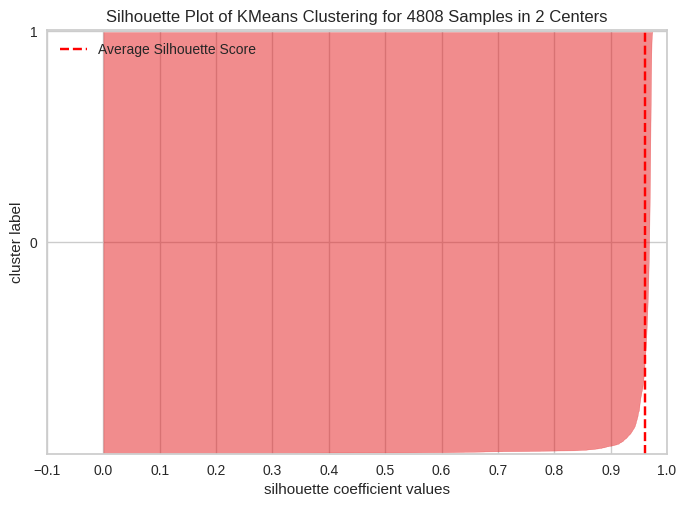

For n_clusters = 3, silhouette score is 0.9608067353149778


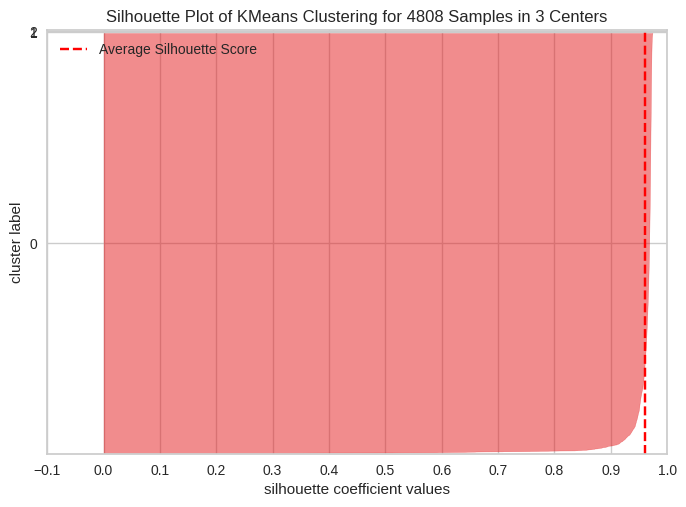

For n_clusters = 4, silhouette score is 0.9590171984079868


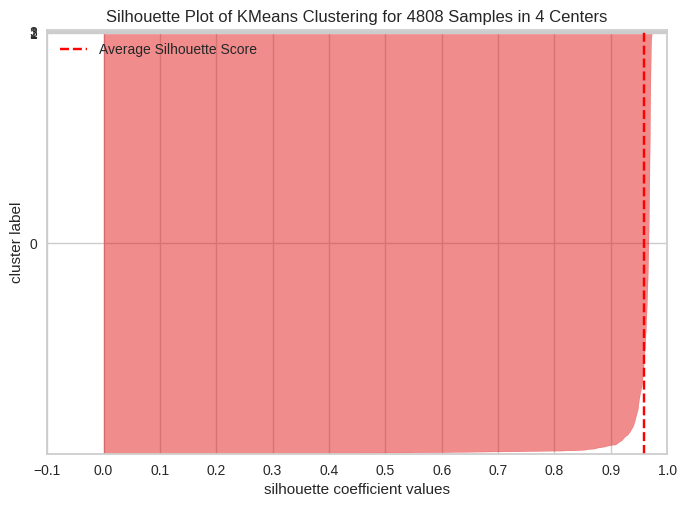

For n_clusters = 5, silhouette score is 0.9367044624539187


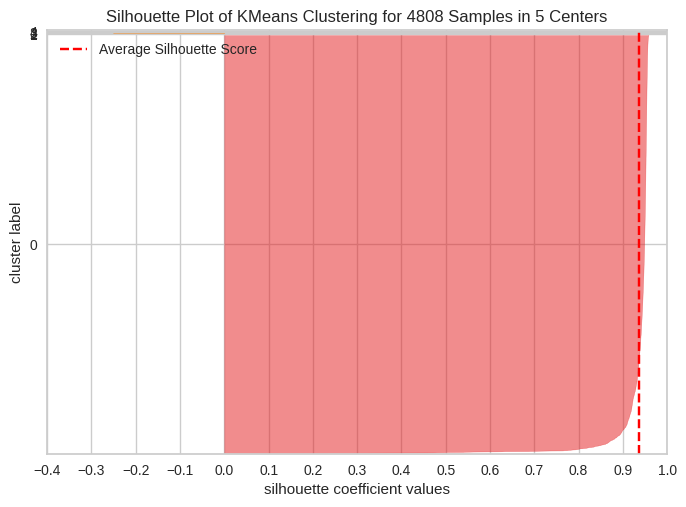

For n_clusters = 6, silhouette score is 0.4495453759448359


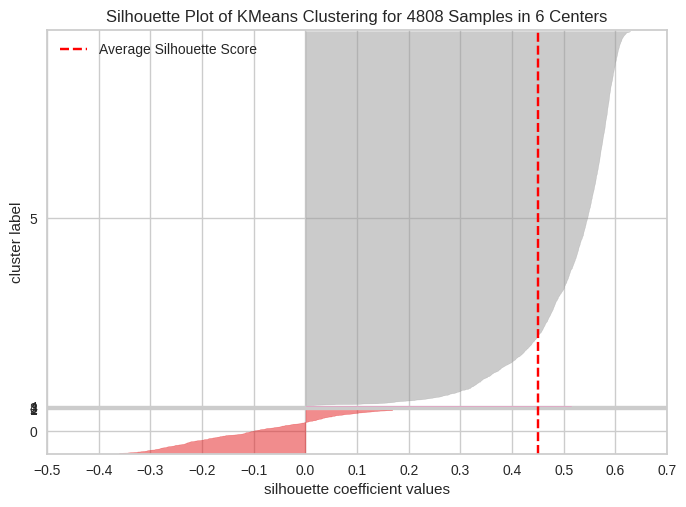

For n_clusters = 7, silhouette score is 0.4297312209832012


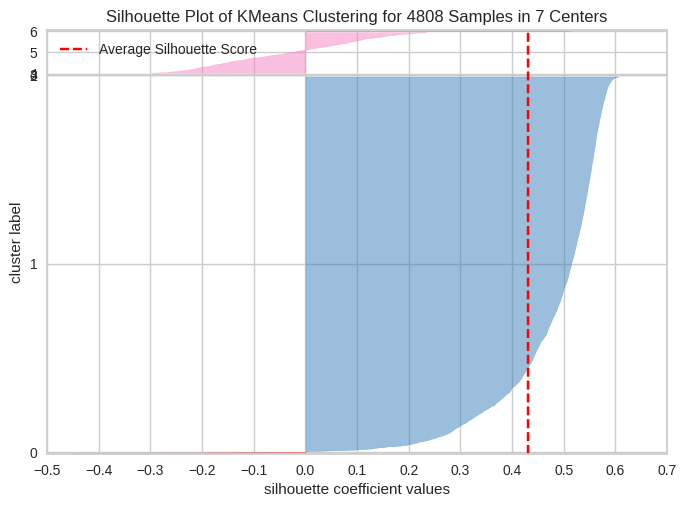

For n_clusters = 8, silhouette score is 0.44317426513763775


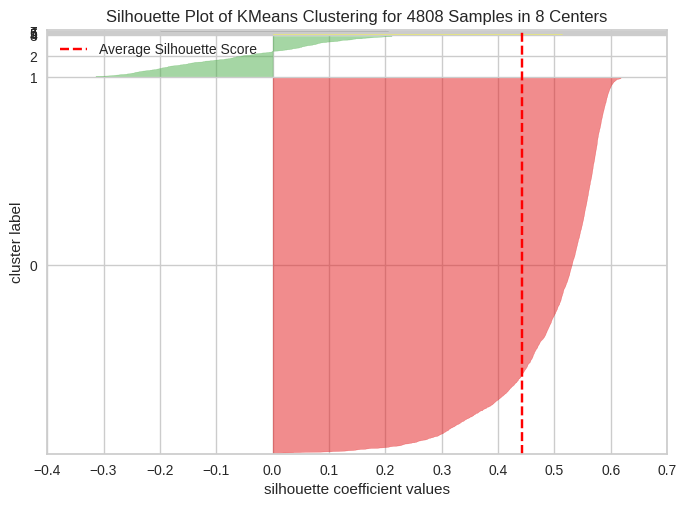

For n_clusters = 9, silhouette score is 0.44372243172194703


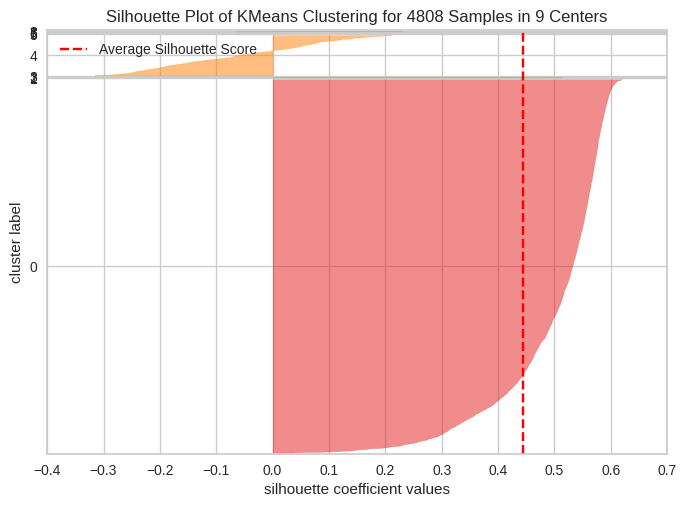

For n_clusters = 10, silhouette score is 0.4513531531457791


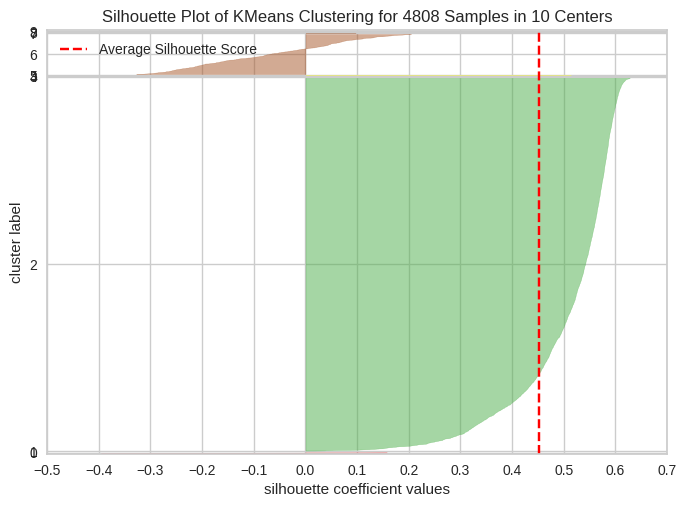

For n_clusters = 11, silhouette score is 0.20408944720358413


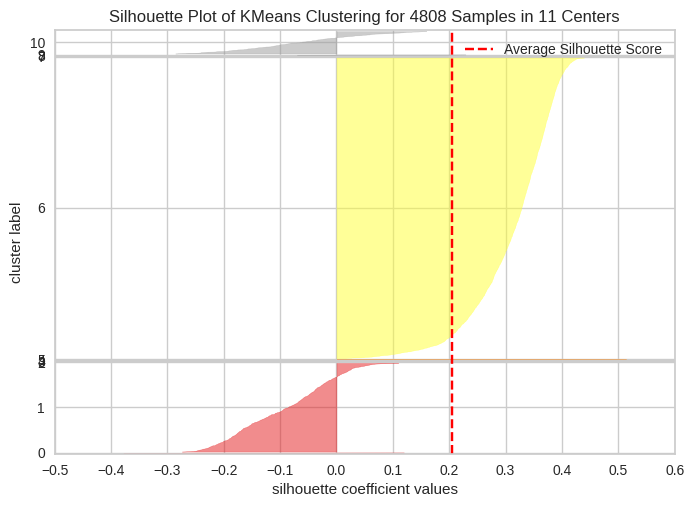

For n_clusters = 12, silhouette score is 0.1867696542524786


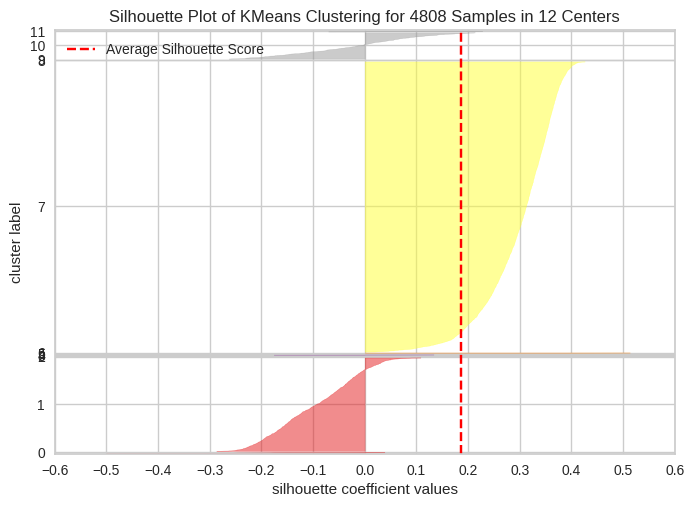

For n_clusters = 13, silhouette score is 0.2079339667108268


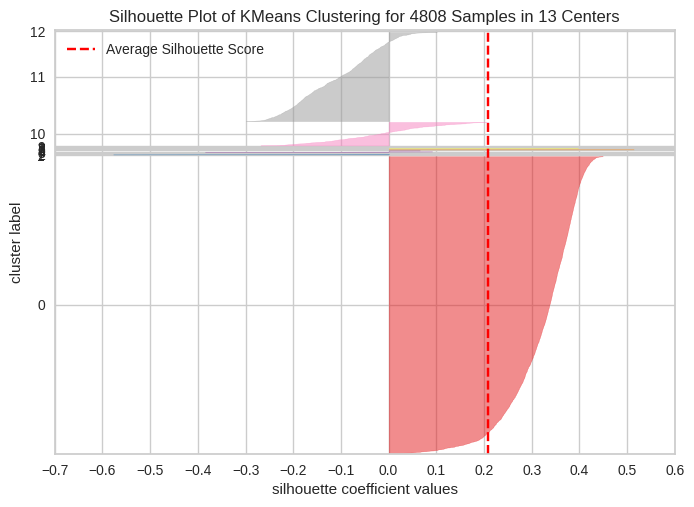

For n_clusters = 14, silhouette score is 0.3652684186795138


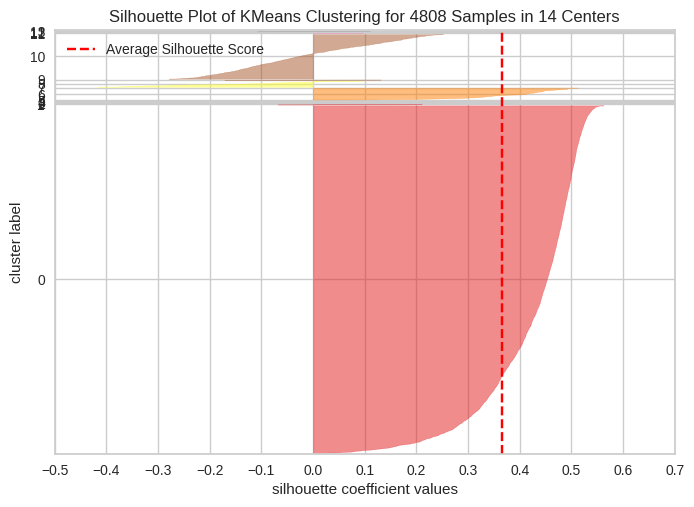

For n_clusters = 15, silhouette score is 0.05198296941430388


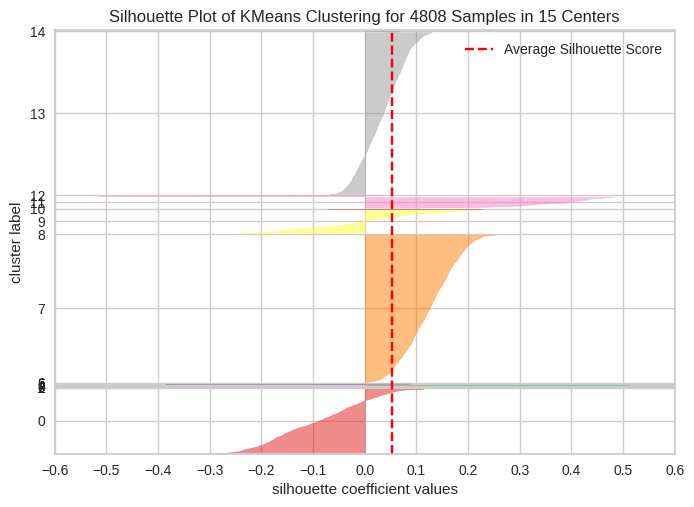

For n_clusters = 16, silhouette score is 0.20327080180149076


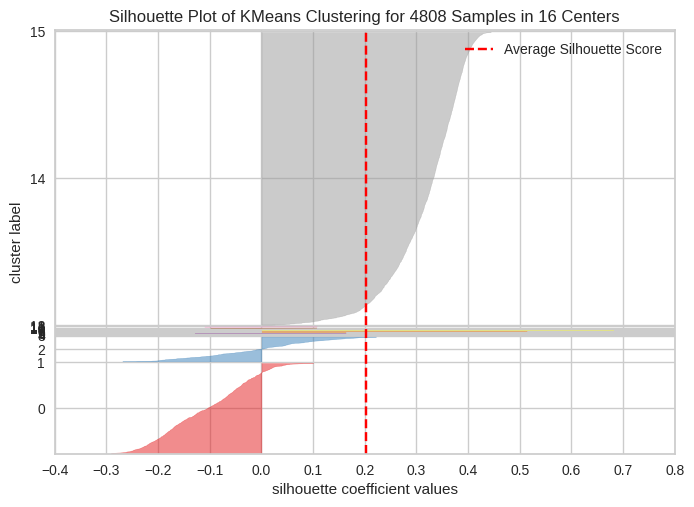

For n_clusters = 17, silhouette score is 0.05264949042654371


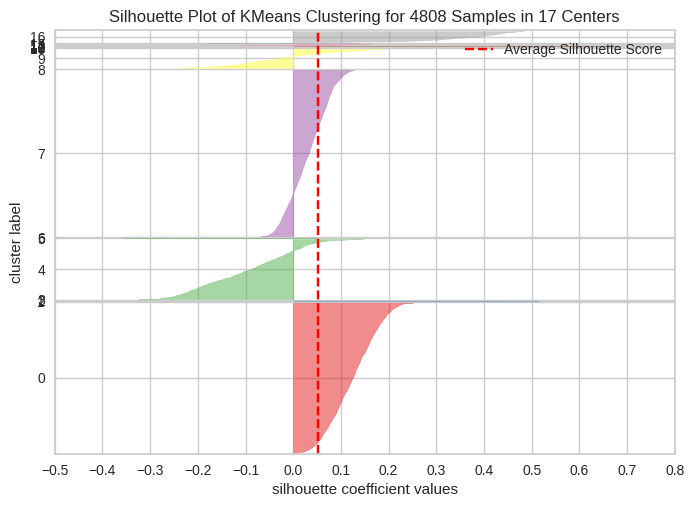

For n_clusters = 18, silhouette score is 0.050346739554299025


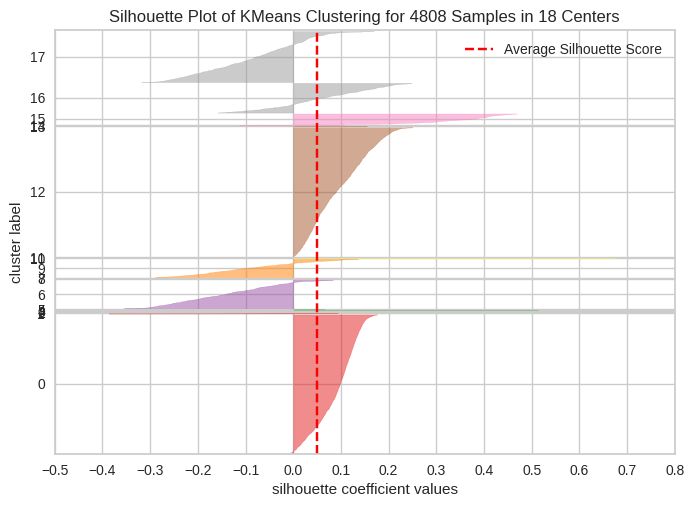

For n_clusters = 19, silhouette score is 0.08738777646873302


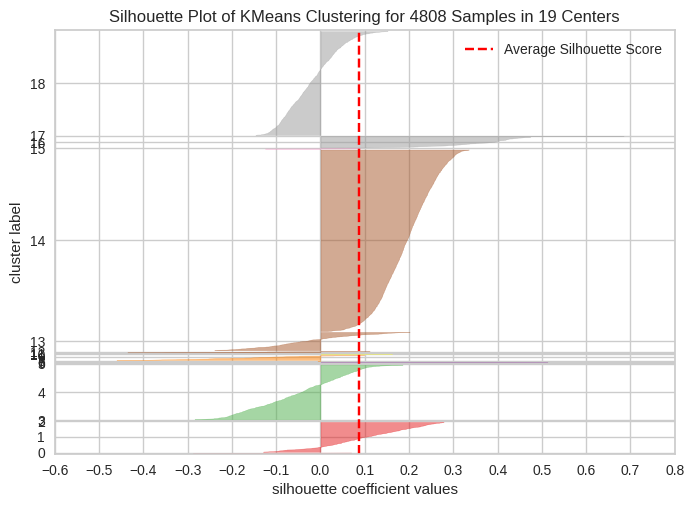

In [75]:
silhouette_analysis(20)

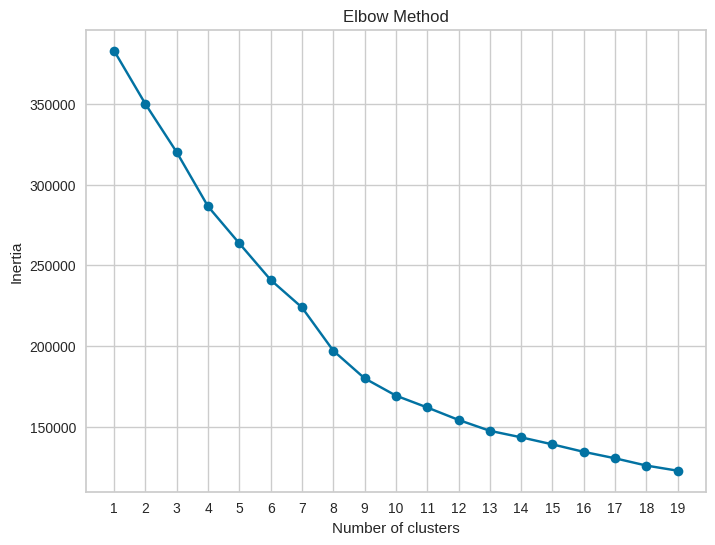

In [82]:
inertia = []  # List to store the inertia for each k
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(final_df)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, 20))
plt.show()

In [86]:
# Apply k-means with the chosen number of clusters (assuming k=6)
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(final_df)

# Add cluster labels to the dataframe
final_df['Cluster'] = cluster_labels

# Analyze the clusters
# This part involves statistical analysis of each cluster, for example:
print(final_df.groupby('Cluster').mean())

             type   country  release_year    rating     month       day  \
Cluster                                                                   
0        0.057603 -0.288865      0.224314 -0.426745 -0.077141  0.264393   
1        0.516942 -0.047947      0.078746  0.263538  0.029938  0.060952   
2       -0.169969 -0.446287     -5.326401  1.098192  1.182952 -1.097002   
3       -0.147789  0.035794     -0.036060 -0.041889 -0.004177 -0.035971   
4       -0.169969 -0.417619      0.765683 -0.923908 -1.582599 -1.097002   
5       -0.169969 -0.446287     -5.746545  2.311451  1.182952 -1.097002   
6       -0.169969 -0.360283      0.100456  0.154545  1.182952  0.308163   
7       -0.169969 -0.446287      0.555611 -0.923908  1.459507 -0.494789   

         day_of_week  duration_numeric         PC1         PC2         PC3  \
Cluster                                                                      
0          -0.345190         -0.964699    1.116351   -0.693814    2.663185   
1          -0.0

In [87]:
kmeans.cluster_centers_

array([[ 5.76028759e-02, -2.88864547e-01,  2.24313709e-01,
        -4.26744798e-01, -7.71413730e-02,  2.64392674e-01,
        -3.45190452e-01, -9.64699215e-01,  1.11635052e+00,
        -6.93813642e-01,  2.66318491e+00, -2.73270403e+00,
        -4.04904371e-01,  9.43511473e-01, -6.48611258e+00,
        -1.40498499e+00, -1.77928201e+00,  8.98496241e+00],
       [ 5.16942415e-01, -4.79467873e-02,  7.87459873e-02,
         2.63537920e-01,  2.99383737e-02,  6.09520477e-02,
        -3.47956329e-02, -6.40789567e-01,  1.36367055e-01,
         2.65426025e-01,  1.78883939e-01, -4.71679993e-01,
         2.25752469e-01,  6.50690262e-01, -1.30558089e+00,
        -4.46055619e-01,  8.07816087e-01,  4.00000000e+00],
       [-1.69968716e-01, -4.46286646e-01, -5.32640119e+00,
         1.09819159e+00,  1.18295173e+00, -1.09700196e+00,
         5.58808733e-01,  2.76520861e+00,  1.65493259e+02,
        -2.11952415e+01, -4.29076493e+01,  4.18179977e+01,
         3.24092068e+01, -2.13083028e+01, -4.20120427e

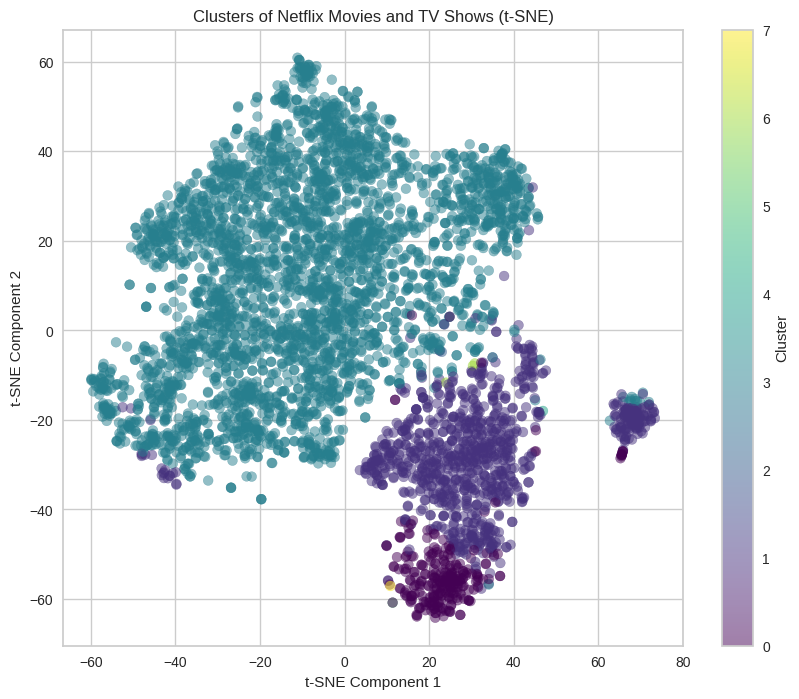

In [88]:
from sklearn.manifold import TSNE

# Initialize t-SNE model
tsne = TSNE(n_components=2, random_state=42)

# Fit and transform the data
tsne_df = tsne.fit_transform(final_df)

# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(tsne_df[:, 0], tsne_df[:, 1], c=final_df['Cluster'], cmap='viridis', alpha=0.5, s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Clusters of Netflix Movies and TV Shows (t-SNE)')
plt.colorbar(label='Cluster')
plt.show()
